In [4]:
import pandas as pd
import numpy as np
import random

# Danh sách nghề
jobs = ["student", "engineer", "teacher", "doctor", 
        "artist", "athlete", "office_worker", "retired"]

# Hàm tạo bản ghi
def generate_person():
    job = random.choice(jobs)
    
    # Tuổi theo nghề
    if job == "student":
        age = np.random.randint(16, 25)
    elif job == "retired":
        age = np.random.randint(60, 75)
    else:
        age = np.random.randint(22, 60)
    
    # Chiều cao, cân nặng (giả lập theo nghề)
    if job == "athlete":
        height = np.random.normal(1.80, 0.07)  # mét
        weight = np.random.normal(80, 10)      # kg
    elif job == "student":
        height = np.random.normal(1.65, 0.08)
        weight = np.random.normal(55, 8)
    elif job == "retired":
        height = np.random.normal(1.60, 0.07)
        weight = np.random.normal(60, 10)
    else:
        height = np.random.normal(1.70, 0.08)
        weight = np.random.normal(65, 12)
    
    # BMI và phân loại
    bmi = weight / (height ** 2)
    if bmi < 18.5:
        label = "underweight"
    elif bmi < 25:
        label = "normal"
    else:
        label = "overweight"
    
    return {
        "job": job,
        "age": age,
        "height": round(height, 2),
        "weight": round(weight, 1),
        "BMI": round(bmi, 1),
        "label": label
    }

# Sinh 1000 bản ghi
data = [generate_person() for _ in range(1000)]

# Tạo DataFrame
df = pd.DataFrame(data)

# Xuất ra CSV
df.to_csv("data_jobs.csv", index=False, encoding="utf-8-sig")

print("Đã tạo file data_jobs.csv với 1000 bản ghi!")
df.head()

Đã tạo file data_jobs.csv với 1000 bản ghi!


,job,age,height,weight,BMI,label
0,engineer,42,1.71,64.6,22.0,normal
1,doctor,31,1.74,67.0,22.1,normal
2,artist,23,1.70,60.3,20.8,normal
3,athlete,49,1.88,81.9,23.1,normal
4,teacher,36,1.65,69.8,25.5,overweight


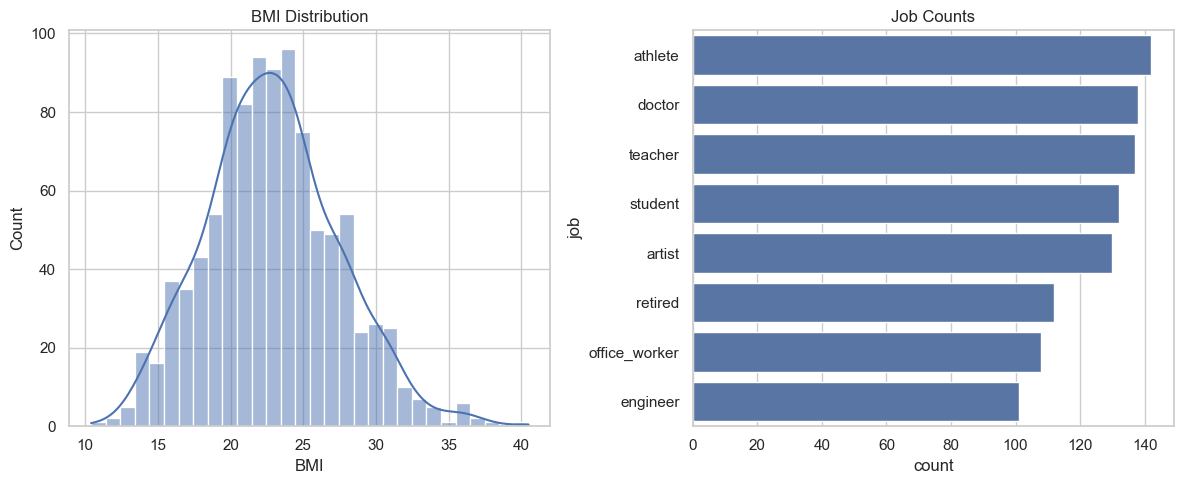

Phân phối nhãn (underweight / normal / overweight):
label
normal         548
overweight     291
underweight    161
Name: count, dtype: int64


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(12,5))

# Phân phối BMI
plt.subplot(1,2,1)
sns.histplot(df['BMI'], bins=30, kde=True).set_title("BMI Distribution")

# Số lượng job
plt.subplot(1,2,2)
sns.countplot(y="job", data=df, order=df['job'].value_counts().index).set_title("Job Counts")

plt.tight_layout()
plt.show()

print("Phân phối nhãn (underweight / normal / overweight):")
print(df['label'].value_counts())


In [11]:
import pandas as pd
import numpy as np
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

# -----------------------------
# Assume df is already loaded
# -----------------------------

# Features (X) and Target (y)
X = df[['job', 'age', 'height', 'weight']]
y = df['label']

# One-hot encoding for 'job'
job_encoder = OneHotEncoder(sparse_output=False)
job_encoded = job_encoder.fit_transform(X[['job']])
job_cols = [f"job_{cat}" for cat in job_encoder.categories_[0]]
X_job = pd.DataFrame(job_encoded, columns=job_cols, index=X.index)

# Scaling numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['age', 'height', 'weight']])
X_scaled = pd.DataFrame(X_scaled, columns=['age', 'height', 'weight'], index=X.index)

# Final X
X = pd.concat([X_job, X_scaled], axis=1)

# Encode labels
le = LabelEncoder()
y = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Models
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'DecisionTree': DecisionTreeClassifier(max_depth=10),
    'RandomForest': RandomForestClassifier(n_estimators=100),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'SVM': SVC(probability=True)
}

# Train and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)

    results[name] = (acc, mae, mse, rmse)
    print(f"{name}: ACC={acc:.4f}, MAE={mae:.4f}, RMSE={rmse:.4f}")

# Optional: create a summary DataFrame
results_df = pd.DataFrame.from_dict(
    results, orient='index', columns=['Accuracy', 'MAE', 'MSE', 'RMSE']
)
print("\nModel Performance Summary:")
print(results_df.sort_values(by="Accuracy", ascending=False))


LogisticRegression: ACC=0.9600, MAE=0.0700, RMSE=0.3606
DecisionTree: ACC=0.9400, MAE=0.0950, RMSE=0.4062
RandomForest: ACC=0.9250, MAE=0.1150, RMSE=0.4416
KNN: ACC=0.8500, MAE=0.2300, RMSE=0.6245
SVM: ACC=0.9300, MAE=0.1100, RMSE=0.4359

Model Performance Summary:
                    Accuracy    MAE    MSE      RMSE
LogisticRegression     0.960  0.070  0.130  0.360555
DecisionTree           0.940  0.095  0.165  0.406202
SVM                    0.930  0.110  0.190  0.435890
RandomForest           0.925  0.115  0.195  0.441588
KNN                    0.850  0.230  0.390  0.624500


In [14]:
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Convert DataFrames to NumPy
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

# One-hot encode target
num_classes = len(le.classes_)
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

def build_dense(input_dim, num_classes):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

cnn = build_dense(X_train_np.shape[1], num_classes)

cnn.fit(X_train_np, y_train_cat,
        epochs=20, batch_size=16,
        verbose=1, validation_split=0.3)


Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6411 - loss: 0.9346 - val_accuracy: 0.7208 - val_loss: 0.7985
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7679 - loss: 0.6991 - val_accuracy: 0.7583 - val_loss: 0.6067
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8589 - loss: 0.5220 - val_accuracy: 0.8833 - val_loss: 0.4466
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9089 - loss: 0.3887 - val_accuracy: 0.9292 - val_loss: 0.3418
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9321 - loss: 0.2948 - val_accuracy: 0.9500 - val_loss: 0.2754
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9446 - loss: 0.2357 - val_accuracy: 0.9542 - val_loss: 0.2313
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9607 - loss: 0.1941 - val_accuracy: 0.9500 - val_loss: 0.2021
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9661 - loss: 0.1650 - val_accuracy: 0.9583 - val_loss:

In [16]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Predict class indices
y_pred = cnn.predict(X_test_np).argmax(axis=1)

# Evaluate
print("CNN Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
CNN Accuracy: 0.975

Confusion Matrix:
 [[106   0   0]
 [  1  58   0]
 [  4   0  31]]

Classification Report:
               precision    recall  f1-score   support

      normal       0.95      1.00      0.98       106
  overweight       1.00      0.98      0.99        59
 underweight       1.00      0.89      0.94        35

    accuracy                           0.97       200
   macro avg       0.98      0.96      0.97       200
weighted avg       0.98      0.97      0.97       200



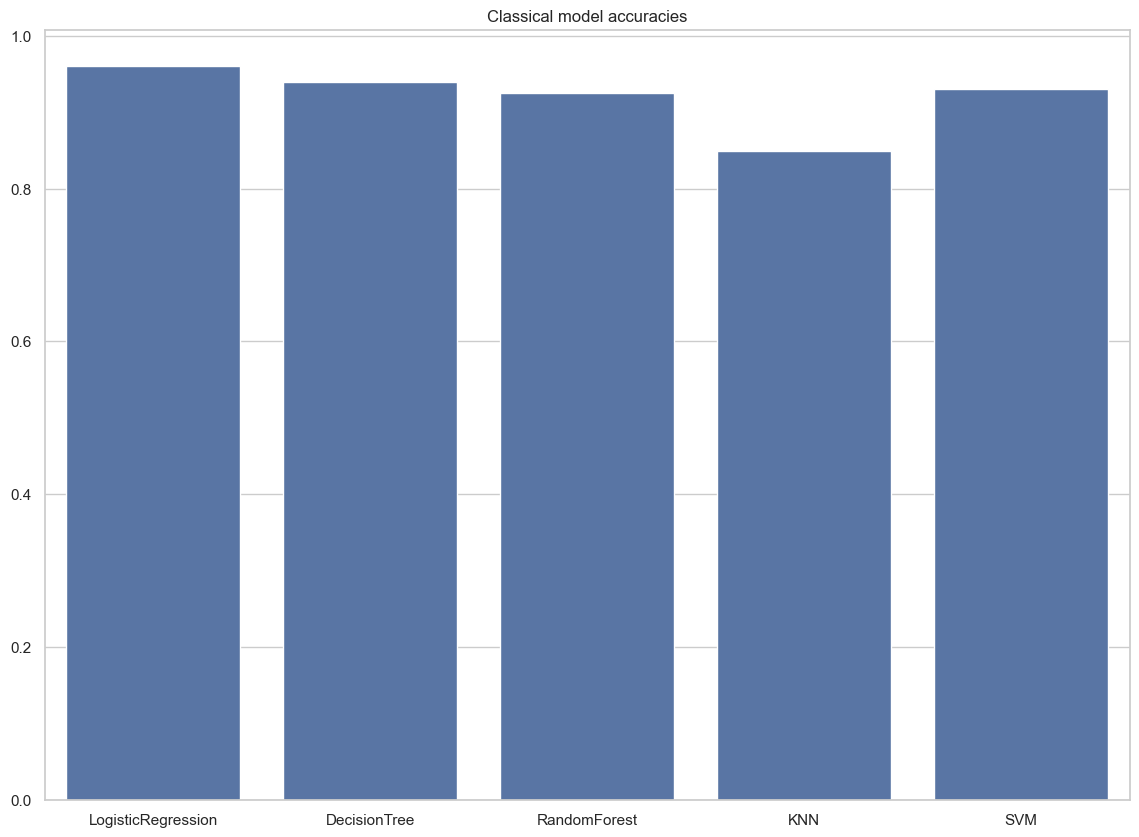

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

f, _ = plt.subplots(figsize=(14, 10))

# Plot classical model accuracies
sns.barplot(x=list(results.keys()), y=[val[0] for val in results.values()])
plt.title("Classical model accuracies")
plt.show()

In [ ]:
Ta Cao Son

In [24]:
import os, json

# Paths
advice_path = "advice.json"
kb_path = "kb_healthGuide.json"  # same folder as notebook

json_data = None
if os.path.exists(advice_path):
    with open(advice_path, "r", encoding="utf-8") as f:
        json_data = json.load(f)
elif os.path.exists(kb_path):
    with open(kb_path, "r", encoding="utf-8") as f:
        json_data = json.load(f)
else:
    raise FileNotFoundError("Neither advice.json nor kb_healthGuide.json found in current directory")

# Pretty print
json_dump = json.dumps(json_data, ensure_ascii=False, indent=2)
print(json_dump[:300])  # show first 300 chars


{
  "underweight": [
    "Ăn nhiều bữa nhỏ trong ngày",
    "Tăng cường protein và tinh bột",
    "Ngủ đủ giấc và tập luyện vừa phải"
  ],
  "normal": [
    "Duy trì chế độ ăn cân bằng",
    "Tập thể dục thường xuyên",
    "Theo dõi cân nặng định kỳ"
  ],
  "overweight": [
    "Hạn chế đồ ngọt và nư
